In [2]:
!pip install googlefinance,client

Invalid requirement: 'googlefinance,client'
Traceback (most recent call last):
  File "c:\users\hp\anaconda32\lib\site-packages\pip\_vendor\packaging\requirements.py", line 92, in __init__
    req = REQUIREMENT.parseString(requirement_string)
  File "c:\users\hp\anaconda32\lib\site-packages\pip\_vendor\pyparsing.py", line 1617, in parseString
    raise exc
  File "c:\users\hp\anaconda32\lib\site-packages\pip\_vendor\pyparsing.py", line 1607, in parseString
    loc, tokens = self._parse( instring, 0 )
  File "c:\users\hp\anaconda32\lib\site-packages\pip\_vendor\pyparsing.py", line 1379, in _parseNoCache
    loc,tokens = self.parseImpl( instring, preloc, doActions )
  File "c:\users\hp\anaconda32\lib\site-packages\pip\_vendor\pyparsing.py", line 3376, in parseImpl
    loc, exprtokens = e._parse( instring, loc, doActions )
  File "c:\users\hp\anaconda32\lib\site-packages\pip\_vendor\pyparsing.py", line 1383, in _parseNoCache
    loc,tokens = self.parseImpl( instring, preloc, doActions )
 

In [8]:
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

In [33]:
import matplotlib
import matplotlib.pylab as plt
import matplotlib.finance as mpf
matplotlib.style.use('seaborn')
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5
from plotly.graph_objs import *
from plotly.offline import init_notebook_mode, iplot, iplot_mpl
init_notebook_mode()
from tqdm import tqdm
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [58]:
def Stock_name(cmpyname):
    from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data
    params = [{'q':cmpyname}]
    period = "5Y"
    # get open, high, low, close, volume data (return pandas dataframe)
    df = get_prices_data(params, period)
    df.reset_index(level=None,inplace=True)
    df=df.rename(index=str, columns={"index": "Date"})
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    df['Close_diff'] = df[cmpyname+'_Close']-df.shift()[cmpyname+'_Close']
    df['Close_diff_log'] = np.log1p(df[cmpyname+'_Close'])-np.log1p(df.shift()[cmpyname+'_Close'])
    df = df[[cmpyname+'_Close', 'Close_diff', 'Close_diff_log']]
    df = df.dropna()
    train = df['2013-12-10':'2017-06-01']
    test = df['2017-06-01':]
    len(train), len(test)
    ts = train[cmpyname+'_Close'].as_matrix()
    predictions = np.empty((0), dtype=np.float32)
    n_pre = 200
    for i in tqdm(range(n_pre)):
        arima_3_1_0 = ARIMA(ts, order=(3, 1, 0)).fit(dist=False)
        predict = arima_3_1_0.forecast()[0]
        predictions = np.hstack([predictions, predict])
        ts = np.hstack([ts, predict])
        predictions
        nans = np.zeros(len(train))
    nans[:] = np.nan
    orgs = pd.concat([train[cmpyname+'_Close'], test[:n_pre][cmpyname+'_Close']])
    orgs = pd.DataFrame({'Date': orgs.index,
                         'Original': orgs.as_matrix(),
                         'Prediction': np.hstack([nans, predictions])})
    orgs = orgs.set_index('Date')
    orgs.plot(color=['blue', 'red'])
    plt.show()


100%|██████████| 200/200 [00:08<00:00, 22.49it/s]


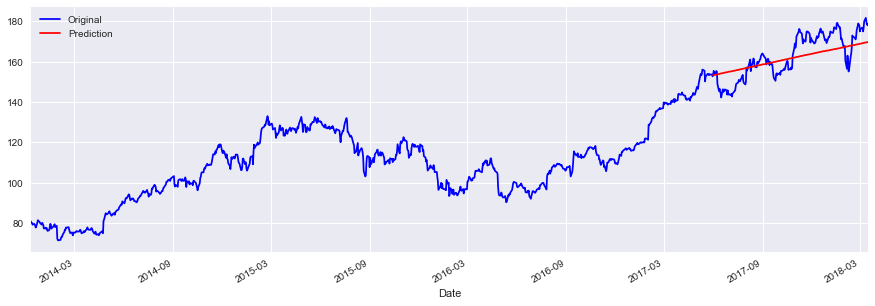

In [60]:
Stock_name('AAPL')

In [ ]:
"'"+cmpyname+'_Close'+"'"